[Cloud Composer: Qwik Start - Console](https://www.cloudskillsboost.google/focuses/2456?catalog_rank=%7B%22rank%22%3A1%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&parent=catalog&search_id=23653832)

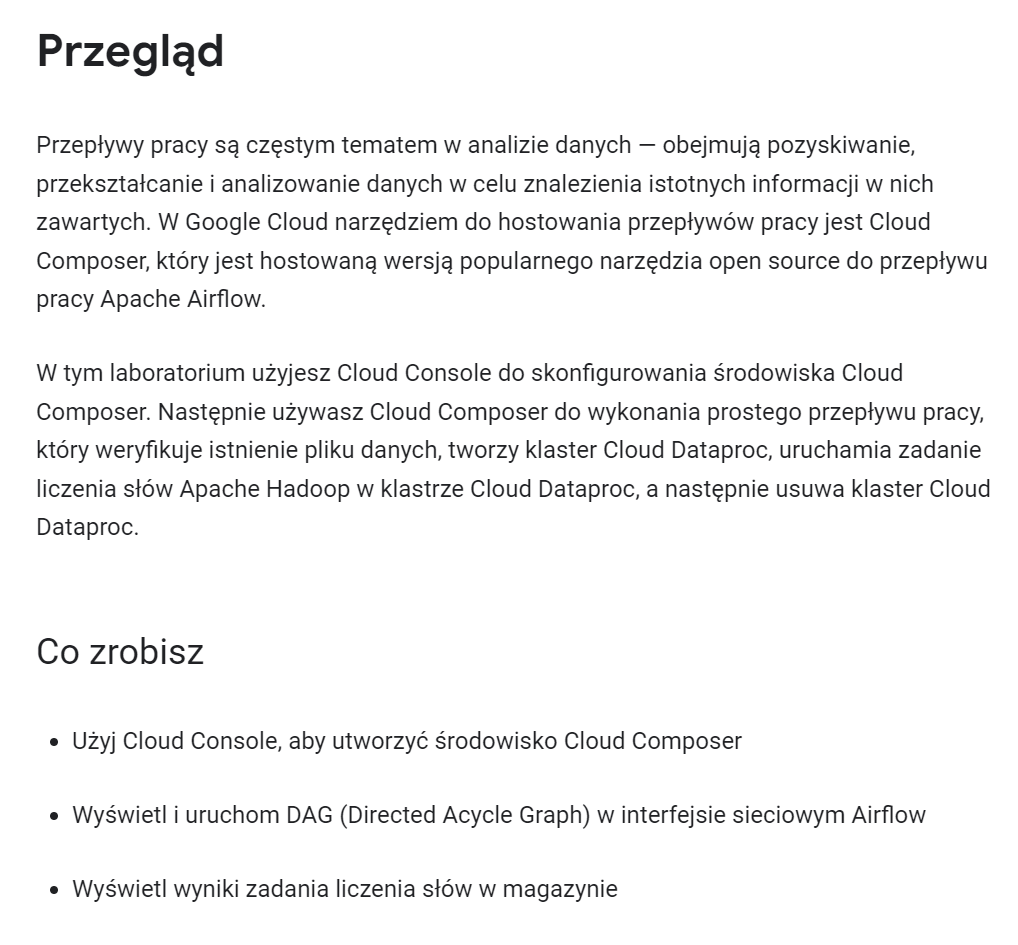

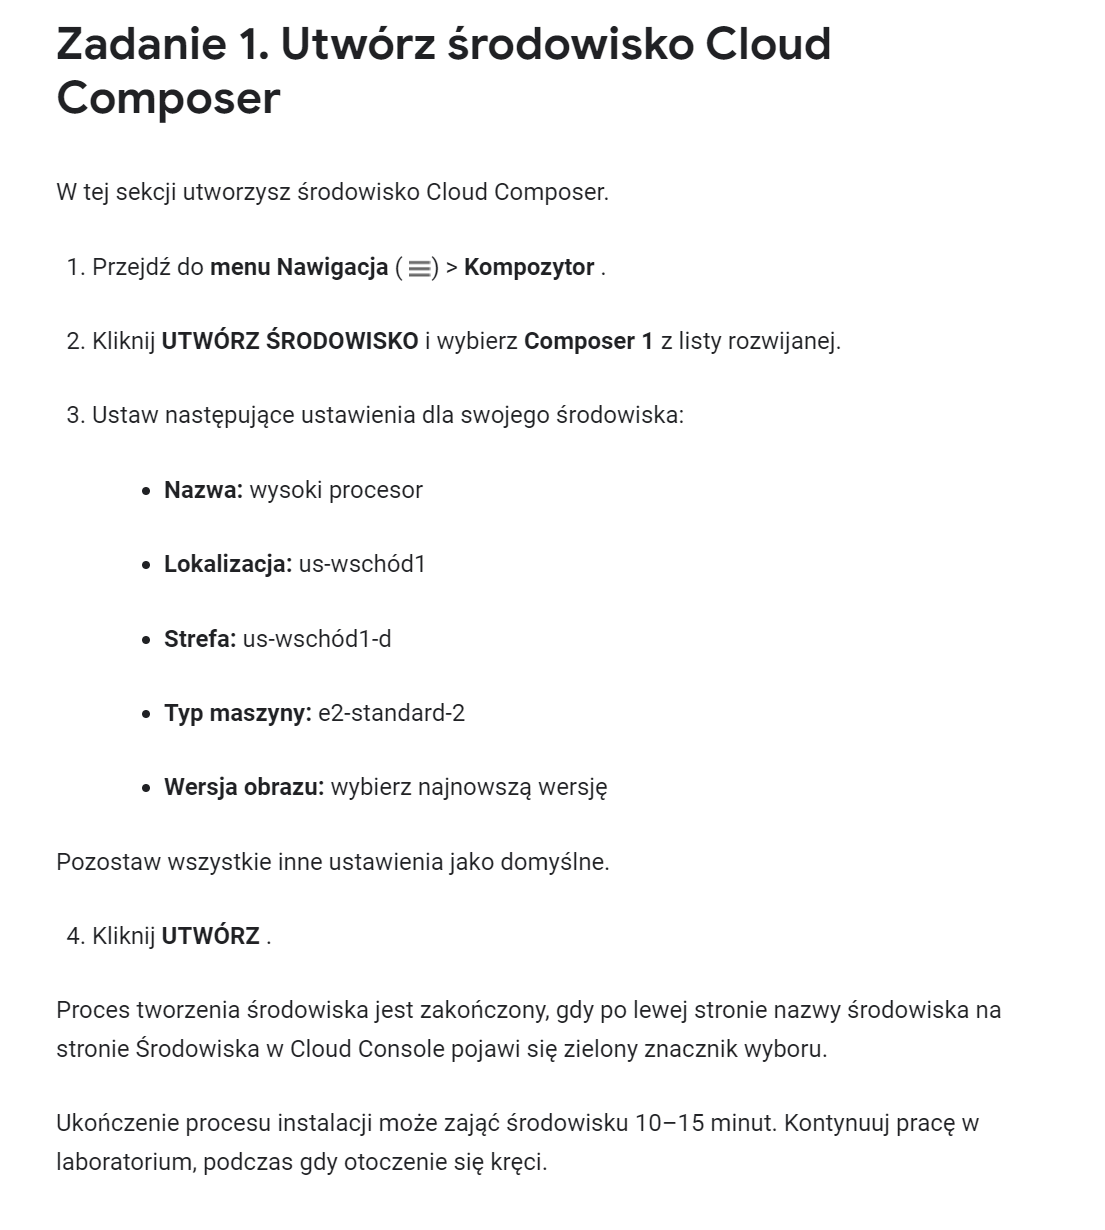

In [ ]:
# highcpu
# us-east1

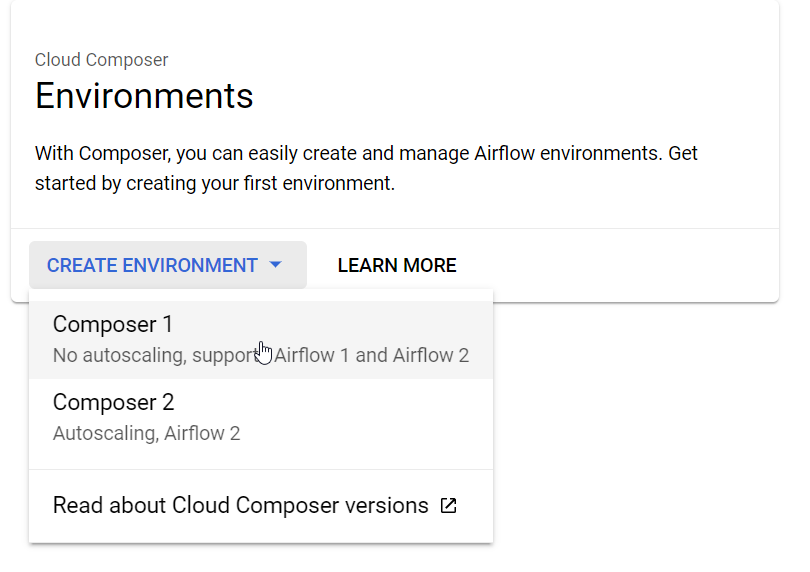

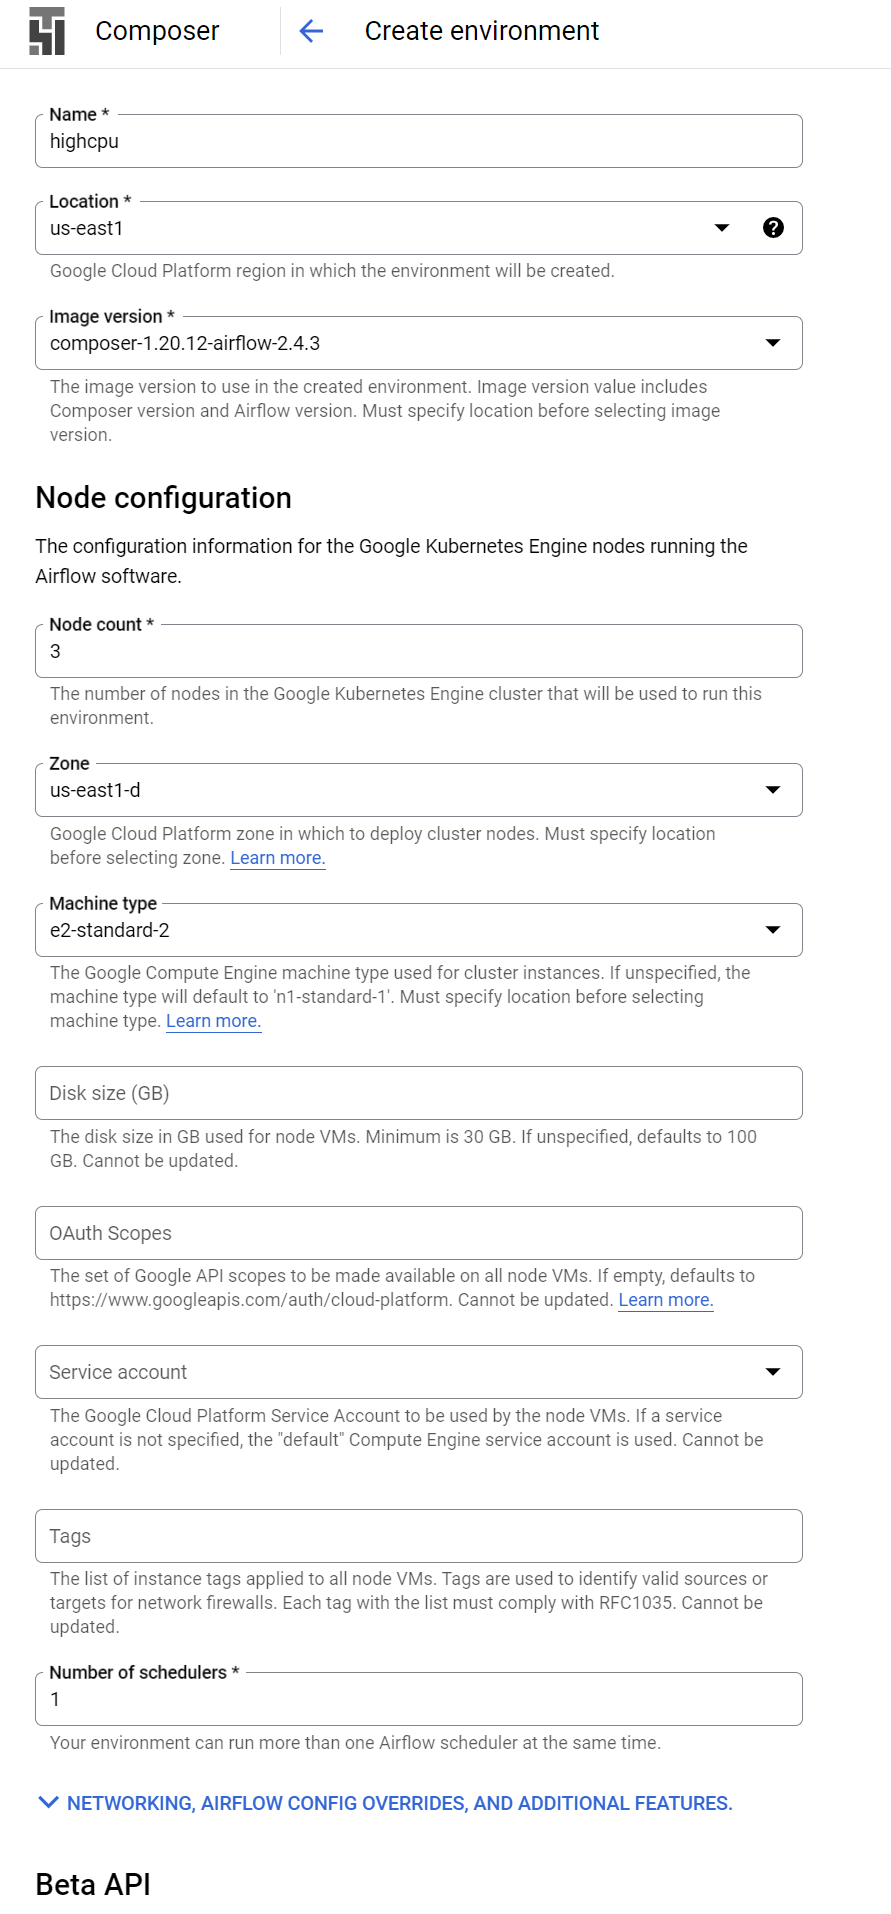

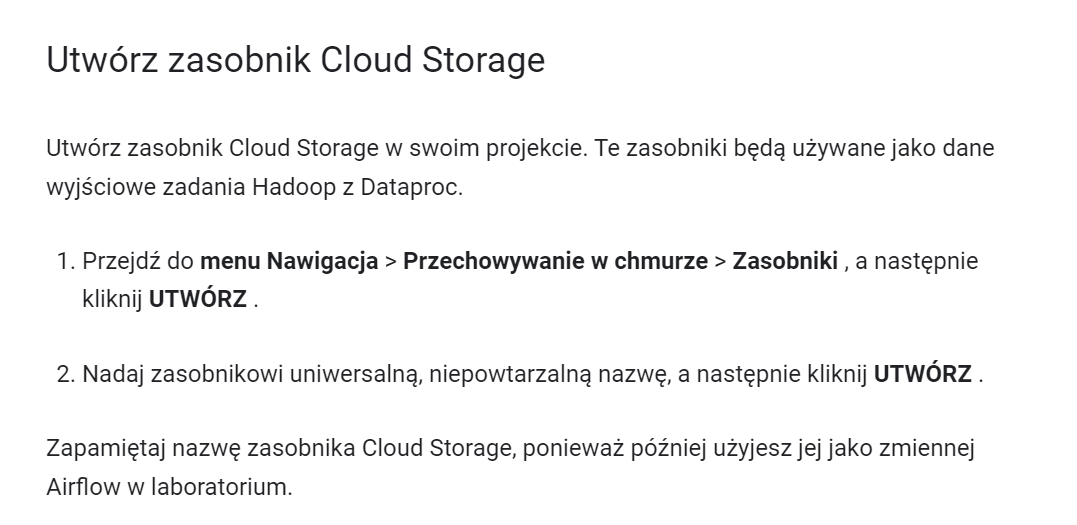

In [ ]:
# lab-684838383

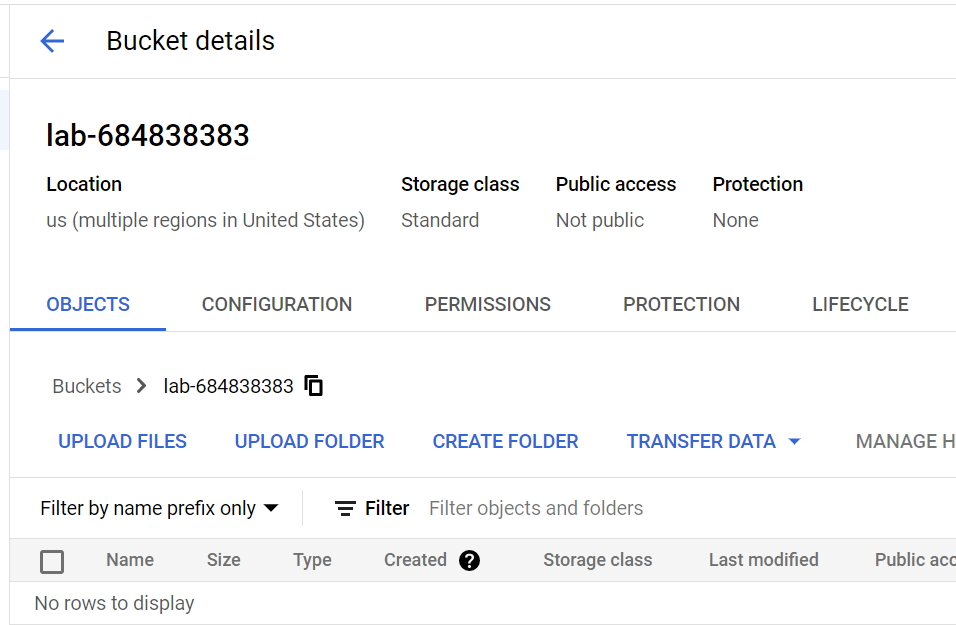

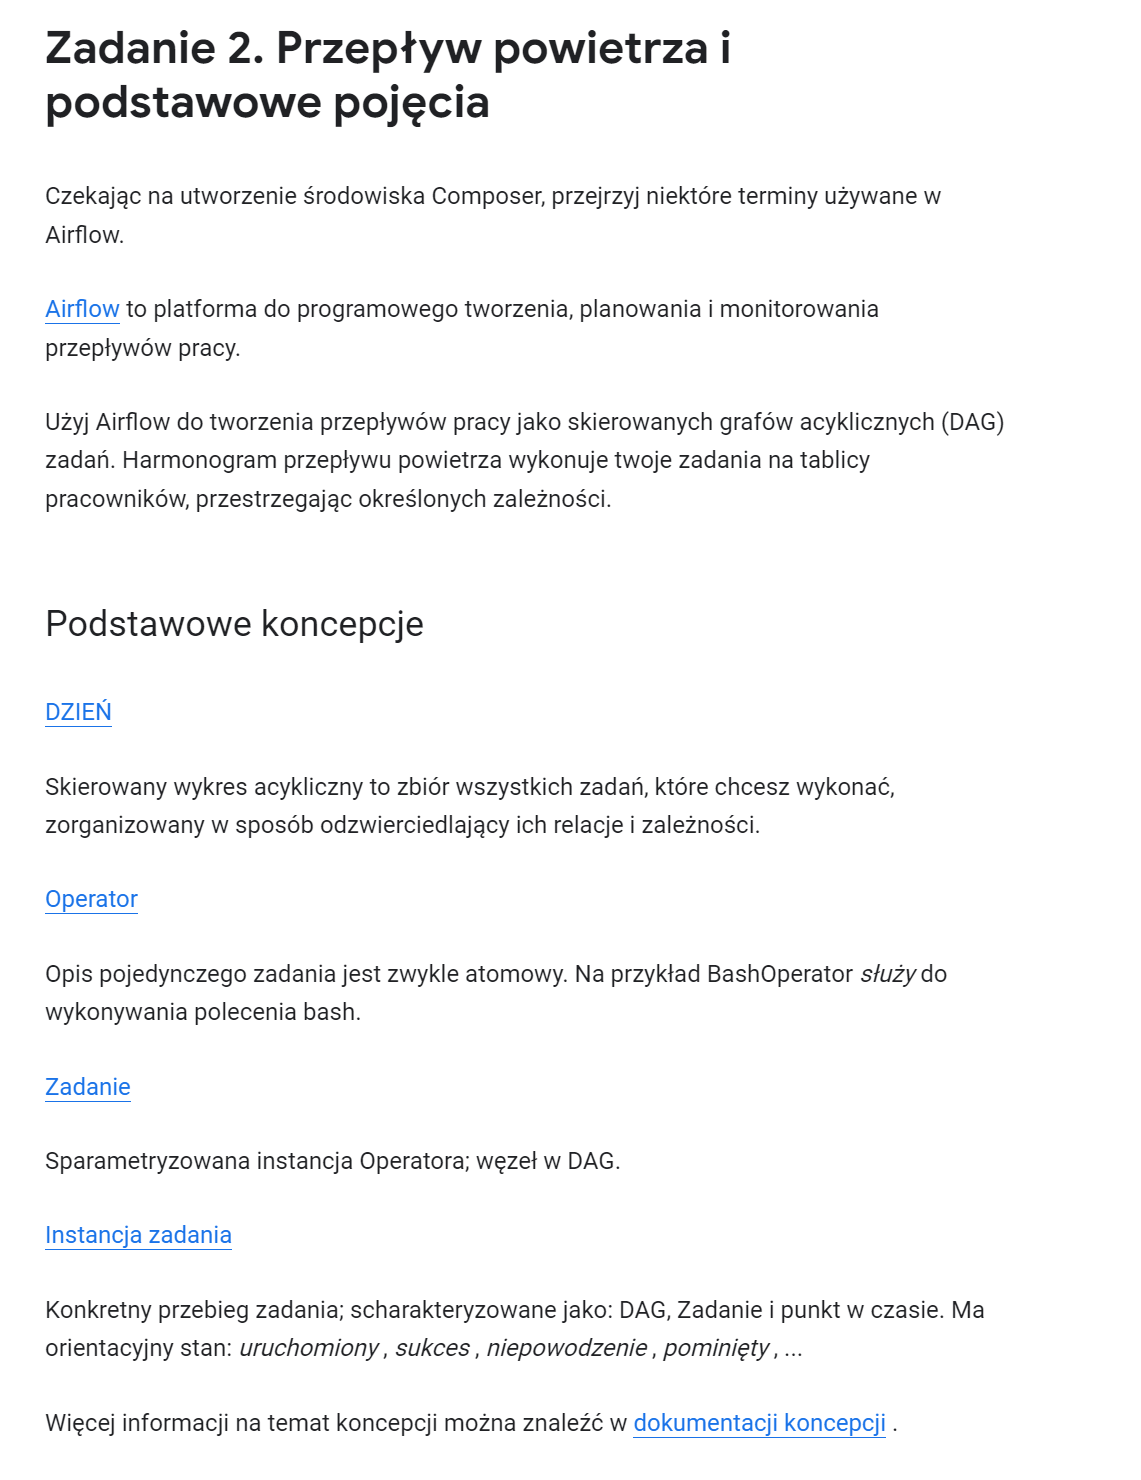

In [ ]:
# https://airflow.apache.org/

# https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/dags.html

# https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/operators.html

# https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/tasks.html

# https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/tasks.html

# https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/index.html

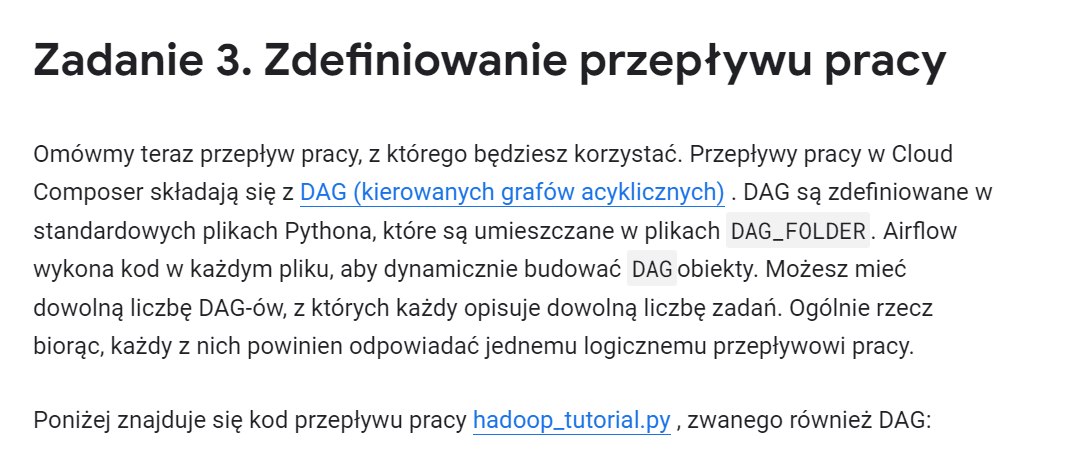

In [ ]:
# https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/dags.html

# https://github.com/GoogleCloudPlatform/python-docs-samples/blob/main/composer/workflows/hadoop_tutorial.py

#Oryginalny py

In [ ]:
"""To jest przykładowy DAG Airflow, który tworzy klaster Cloud Dataproc, uruchamia przykładowe zadanie Hadoop wordcount
i usuwa klaster. Ten DAG opiera się na trzech zmiennych Airflow: https://airflow.apache.org/concepts.html#variables

gcp_project - Projekt Google Cloud, który ma być używany dla klastra Cloud Dataproc.
gce_zone - Strefa Google Compute Engine, w której powinien być utworzony klaster Cloud Dataproc.
gcs_bucket - Kubek Google Cloud Storage, który ma być używany do przechowywania wyników zadania Hadoop.
Zobacz https://cloud.google.com/storage/docs/creating-buckets, aby utworzyć kubełek.
"""
import datetime
import os
from airflow import models
from airflow.contrib.operators import dataproc_operator
from airflow.utils import trigger_rule
# Output file for Cloud Dataproc job.
output_file = os.path.join(
    models.Variable.get('gcs_bucket'), 'wordcount',
    datetime.datetime.now().strftime('%Y%m%d-%H%M%S')) + os.sep
# Path to Hadoop wordcount example available on every Dataproc cluster.
WORDCOUNT_JAR = (
    'file:///usr/lib/hadoop-mapreduce/hadoop-mapreduce-examples.jar'
)
# Arguments to pass to Cloud Dataproc job.
wordcount_args = ['wordcount', 'gs://pub/shakespeare/rose.txt', output_file]
yesterday = datetime.datetime.combine(
    datetime.datetime.today() - datetime.timedelta(1),
    datetime.datetime.min.time())
default_dag_args = {
    # Setting start date as yesterday starts the DAG immediately when it is
    # detected in the Cloud Storage bucket.
    'start_date': yesterday,
    # To email on failure or retry set 'email' arg to your email and enable
    # emailing here.
    'email_on_failure': False,
    'email_on_retry': False,
    # If a task fails, retry it once after waiting at least 5 minutes
    'retries': 1,
    'retry_delay': datetime.timedelta(minutes=5),
    'project_id': models.Variable.get('gcp_project')
}
# [START composer_hadoop_schedule]
with models.DAG(
        'composer_hadoop_tutorial',
        # Continue to run DAG once per day
        schedule_interval=datetime.timedelta(days=1),
        default_args=default_dag_args) as dag:
    # [END composer_hadoop_schedule]
    # Create a Cloud Dataproc cluster.
    create_dataproc_cluster = dataproc_operator.DataprocClusterCreateOperator(
        task_id='create_dataproc_cluster',
        # Give the cluster a unique name by appending the date scheduled.
        # See https://airflow.apache.org/code.html#default-variables
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        num_workers=2,
        region='us-central1',
        zone=models.Variable.get('gce_zone'),
        image_version='2.0',
        master_machine_type='n1-standard-2',
        worker_machine_type='n1-standard-2')
    # Run the Hadoop wordcount example installed on the Cloud Dataproc cluster
    # master node.
    run_dataproc_hadoop = dataproc_operator.DataProcHadoopOperator(
        task_id='run_dataproc_hadoop',
        region='us-central1',
        main_jar=WORDCOUNT_JAR,
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        arguments=wordcount_args)
    # Delete Cloud Dataproc cluster.
    delete_dataproc_cluster = dataproc_operator.DataprocClusterDeleteOperator(
        task_id='delete_dataproc_cluster',
        region='us-central1',
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        # Setting trigger_rule to ALL_DONE causes the cluster to be deleted
        # even if the Dataproc job fails.
        trigger_rule=trigger_rule.TriggerRule.ALL_DONE)
    # [START composer_hadoop_steps]
    # Define DAG dependencies.
    create_dataproc_cluster >> run_dataproc_hadoop >> delete_dataproc_cluster
    # [END composer_hadoop_steps]

#Do własnych testów py

In [ ]:
import datetime
import os
from airflow import models
from airflow.contrib.operators import dataproc_operator
from airflow.utils import trigger_rule

output_file = os.path.join(
    models.Variable.get('gcs_bucket'), 'wordcount',
    datetime.datetime.now().strftime('%Y%m%d-%H%M%S')) + os.sep

WORDCOUNT_JAR = (
    'file:///usr/lib/hadoop-mapreduce/hadoop-mapreduce-examples.jar'
)

wordcount_args = ['wordcount', 'gs://pub/shakespeare/rose.txt', output_file]
yesterday = datetime.datetime.combine(
    datetime.datetime.today() - datetime.timedelta(1),
    datetime.datetime.min.time())
default_dag_args = {

    'start_date': yesterday,
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': datetime.timedelta(minutes=5),
    'project_id': models.Variable.get('gcp_project')
}

with models.DAG(
        'composer_hadoop_tutorial',
        schedule_interval=datetime.timedelta(days=1),
        default_args=default_dag_args) as dag:
    create_dataproc_cluster = dataproc_operator.DataprocClusterCreateOperator(
        task_id='create_dataproc_cluster',
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        num_workers=2,
        region='europe-central2',
        zone=models.Variable.get('gce_zone'),
        image_version='2.0',
        master_machine_type='n1-standard-2',
        worker_machine_type='n1-standard-2')
    run_dataproc_hadoop = dataproc_operator.DataProcHadoopOperator(
        task_id='run_dataproc_hadoop',
        region='europe-central2',
        main_jar=WORDCOUNT_JAR,
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        arguments=wordcount_args)
    delete_dataproc_cluster = dataproc_operator.DataprocClusterDeleteOperator(
        task_id='delete_dataproc_cluster',
        region='europe-central2',
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        trigger_rule=trigger_rule.TriggerRule.ALL_DONE)
    create_dataproc_cluster >> run_dataproc_hadoop >> delete_dataproc_cluster

#Py z komentarzami

In [ ]:
"""To jest przykładowy DAG Airflow, który tworzy klaster Cloud Dataproc, uruchamia przykładowe zadanie Hadoop wordcount
i usuwa klaster. Ten DAG opiera się na trzech zmiennych Airflow: https://airflow.apache.org/concepts.html#variables

gcp_project - Projekt Google Cloud, który ma być używany dla klastra Cloud Dataproc.
gce_zone - Strefa Google Compute Engine, w której powinien być utworzony klaster Cloud Dataproc.
gcs_bucket - Kubek GCS, który ma być używany do przechowywania wyników zadania Hadoop.
"""
import datetime
import os

# Importuje klasę models z biblioteki Airflow, która zawiera definicje obiektów używanych w DAG (Directed Acyclic Graph)
from airflow import models

# Importuje klasę dataproc_operator z modułu contrib.operators biblioteki Airflow, która umożliwia operacje
# związane z usługą Cloud Dataproc.
from airflow.contrib.operators import dataproc_operator

# Importuje klasę trigger_rule z modułu utils biblioteki Airflow, która definiuje reguły dotyczące uruchamiania zadań w DAG.
from airflow.utils import trigger_rule

# Ta linia tworzy zmienną output_file, która zawiera ścieżkę do pliku wyjściowego dla zadania Cloud Dataproc.
# Ścieżka jest tworzona w oparciu o zmienną gcs_bucket pobraną z zmiennych Airflow. Plik zostanie zapisany
# w katalogu 'wordcount' wewnątrz określonego kubełka GCS. Dodatkowo, do nazwy pliku zostanie dodana data i godzina
# w formacie rok-miesiąc-dzień-godzina-minuta-sekunda.
output_file = os.path.join(
    models.Variable.get('gcs_bucket'), 'wordcount',
    datetime.datetime.now().strftime('%Y%m%d-%H%M%S')) + os.sep

# Ta linia definiuje zmienną WORDCOUNT_JAR, która zawiera ścieżkę do pliku JAR zawierającego przykład wordcount
# dostępny na każdym klastrze Dataproc. Plik ten zawiera przykładowy kod Hadoopa, który jest używany do zliczania
# słów w plikach tekstowych.
WORDCOUNT_JAR = (
    'file:///usr/lib/hadoop-mapreduce/hadoop-mapreduce-examples.jar'
)

# Zmienna wordcount_args zawiera listę argumentów, które zostaną przekazane do zadania Cloud Dataproc.
# W tym przypadku składają się one z trzech elementów:
# 'wordcount' - nazwa zadania Hadoopa, które zostanie wykonane.
# 'gs://pub/shakespeare/rose.txt' - ścieżka do pliku wejściowego, który zostanie przetworzony przez zadanie Hadoopa.
# W tym przykładzie jest to plik tekstowy z dziełem szekspirowskim.
# output_file - ścieżka do pliku wyjściowego, w którym zostanie zapisany wynik wykonania zadania Hadoopa.
# Zmienna output_file została zdefiniowana wcześniej i zawiera ścieżkę do katalogu w GCS, gdzie zostanie zapisany wynik.
wordcount_args = ['wordcount', 'gs://pub/shakespeare/rose.txt', output_file]

# Zmienna yesterday jest obliczana jako data, która jest dniem poprzedzającym obecną datę.
# Jest to wykorzystywane jako wartość startowa dla zmiennej start_date w konfiguracji tego zadania w Airflow,
# aby zaplanować wykonanie zadania na dzień poprzedzający uruchomienie DAG-a.
yesterday = datetime.datetime.combine(
    datetime.datetime.today() - datetime.timedelta(1),
    datetime.datetime.min.time())

# Ten fragment kodu definiuje zestaw domyślnych argumentów dla DAG-a (Directed Acyclic Graph) w Airflow:
default_dag_args = {
    # Ustawia datę rozpoczęcia DAG-a na dzień poprzedzający datę uruchomienia. W tym przypadku yesterday to
    # zmienna zawierająca dzień poprzedni względem daty bieżącej.
    'start_date': yesterday,
    # Wyłącza powiadomienia e-mail w przypadku wystąpienia błędu w zadaniach DAG-a.
    'email_on_failure': False,
    # Wyłącza powiadomienia e-mail w przypadku ponownej próby wykonania zadania po niepowodzeniu.
    'email_on_retry': False,
    # Określa liczbę prób ponownego wykonania zadania w przypadku wystąpienia błędu.
    # W tym przypadku ustawiono jedną ponowną próbę.
    'retries': 1,
    # Określa czas oczekiwania między ponownymi próbami wykonania zadania w przypadku wystąpienia błędu.
    # W tym przypadku ustawiono 5 minut.
    'retry_delay': datetime.timedelta(minutes=5),
    # Pobiera identyfikator projektu Google Cloud zdefiniowany jako zmienna Airflow o nazwie 'gcp_project'.
    # Ten identyfikator projektu zostanie wykorzystany do wykonywania operacji na zasobach Google Cloud w ramach tego DAG-a.
    'project_id': models.Variable.get('gcp_project')
}

# Ten fragment kodu definiuje DAG (Directed Acyclic Graph) w Airflow o nazwie 'composer_hadoop_tutorial'.
# Skierowany graf acykliczny to zbiór wszystkich zadań, które chcesz uruchomić, zorganizowany w sposób
# odzwierciedlający ich relacje i zależności.

# Poniżej przedstawiam wyjaśnienie kolejnych linii kodu:
# with models.DAG(...) - Rozpoczyna konstrukcję definicji DAG-a w Airflow.
# Kontekstowy menedżer with jest używany do zapewnienia, że wszystkie operacje związane z DAG-iem będą wykonywane
# w ramach tego kontekstu.
with models.DAG(
        # Nazwa tego DAG-a. Każdy DAG musi mieć unikalną nazwę.
        'composer_hadoop_tutorial',
        # Określa interwał, w jakim ten DAG będzie uruchamiany. W tym przypadku DAG będzie uruchamiany raz na dobę,
        # co jest określone za pomocą datetime.timedelta(days=1).
        schedule_interval=datetime.timedelta(days=1),
        # Ustawia domyślne argumenty dla tego DAG-a, które zostały zdefiniowane wcześniej w zmiennej default_dag_args.
        # as dag: - Przypisuje utworzony DAG do zmiennej dag, dzięki czemu można używać tej zmiennej do dalszego
        # konfigurowania i definiowania zadań wewnątrz tego DAG-a.
        default_args=default_dag_args) as dag:

    # Aby zaaranżować trzy zadania przepływu pracy, DAG importuje następujące operatory:
    # 1. DataprocClusterCreateOperator - tworzy klaster Cloud Dataproc.
    # 2. DataProcHadoopOperator - przesyła zadanie liczenia słów Hadoop i zapisuje wyniki w zasobniku Cloud Storage.
    # 3. DataprocClusterDeleteOperator - usuwa klaster, aby uniknąć naliczania bieżących opłat Compute Engine

    # Operator to opis pojedynczego zadania, zwykle jest atomowy.

    # Tworzy operator, który będzie odpowiedzialny za utworzenie klastra Cloud Dataproc.
    # Jest to operacja wykonana przez specjalny operator DataprocClusterCreateOperator dostępny w Airflow.
    create_dataproc_cluster = dataproc_operator.DataprocClusterCreateOperator(
        # Określa unikalną nazwę tego zadania.
        task_id='create_dataproc_cluster',
        # Nadaje klastrze unikalną nazwę poprzez dołączenie daty zaplanowanej wykonania zadania.
        # Wyrażenie {{ ds_nodash }} zostanie zastąpione aktualną datą w formacie YYYYMMDD.
        # See https://airflow.apache.org/docs/apache-airflow/1.10.12/macros-ref.html
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        # Określa liczbę pracowników w klastrze.
        num_workers=2,
        region='us-central1',
        # Pobiera nazwę strefy (zone) zmienną zdefiniowaną w Airflow.
        zone=models.Variable.get('gce_zone'),
        # Określa wersję obrazu klastra Cloud Dataproc, który ma zostać użyty.
        image_version='2.0',
        # Określa typ maszyny dla węzła master.
        master_machine_type='n1-standard-2',
        # Określa typ maszyny dla węzłów pracujących (workers).
        worker_machine_type='n1-standard-2')



    # Tworzy operator, który będzie odpowiedzialny za uruchomienie zadania Hadoop na klastrze Cloud Dataproc.
    # Jest to operacja wykonana przez specjalny operator DataProcHadoopOperator dostępny w Airflow.
    run_dataproc_hadoop = dataproc_operator.DataProcHadoopOperator(
        # Określa unikalną nazwę tego zadania.
        task_id='run_dataproc_hadoop',
        # Określa region, w którym zostanie uruchomione zadanie.
        region='us-central1',
        # Ścieżka do pliku JAR zawierającego przykładowy kod Hadoopa (np. przykładowy program wordcount).
        # Zmienna WORDCOUNT_JAR zawiera ścieżkę do tego pliku.
        main_jar=WORDCOUNT_JAR,
        # Określa nazwę klastra Cloud Dataproc, na którym ma zostać uruchomione zadanie.
        # Wyrażenie {{ ds_nodash }} zostanie zastąpione aktualną datą w formacie YYYYMMDD.
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        # Określa argumenty, które zostaną przekazane do zadania Hadoop. Zmienna wordcount_args zawiera listę argumentów,
        # w tym ścieżki plików wejściowych i wyjściowych.
        arguments=wordcount_args)

    # Tworzy operator, który będzie odpowiedzialny za usunięcie klastra Cloud Dataproc.
    # Jest to operacja wykonana przez specjalny operator DataprocClusterDeleteOperator dostępny w Airflow.
    delete_dataproc_cluster = dataproc_operator.DataprocClusterDeleteOperator(
        # Określa unikalną nazwę tego zadania.
        task_id='delete_dataproc_cluster',
        # Określa region, w którym znajduje się klastr Cloud Dataproc do usunięcia.
        region='us-central1',
        # Określa nazwę klastra Cloud Dataproc, który ma zostać usunięty. Wyrażenie {{ ds_nodash }}
        # zostanie zastąpione aktualną datą w formacie YYYYMMDD.
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        # Określa zasadę wyzwalania dla tego zadania. W tym przypadku, ustawienie ALL_DONE oznacza, że zadanie
        # usunięcia klastra zostanie wykonane nawet w przypadku błędu poprzedniego zadania.
        trigger_rule=trigger_rule.TriggerRule.ALL_DONE)

    # [START composer_hadoop_steps]
    # Define DAG dependencies.
    # Definiuje zależności pomiędzy zadaniami w DAG-u. Operator create_dataproc_cluster
    # musi zostać wykonany przed run_dataproc_hadoop, a następnie run_dataproc_hadoop musi zakończyć się przed
    # rozpoczęciem delete_dataproc_cluster.
    create_dataproc_cluster >> run_dataproc_hadoop >> delete_dataproc_cluster

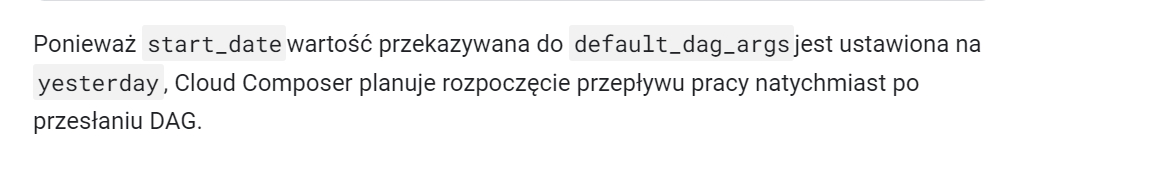

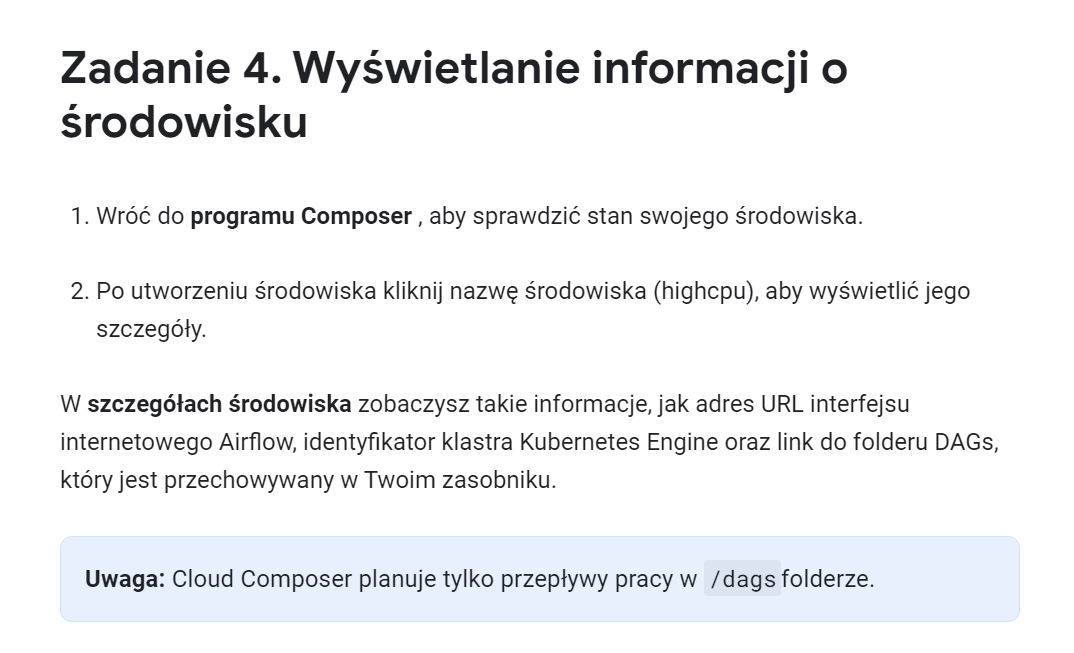

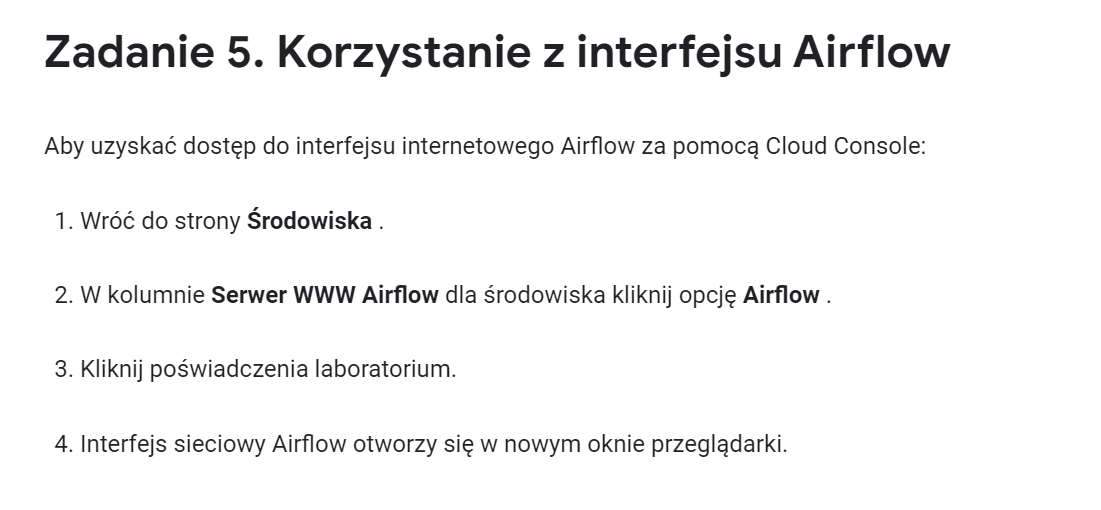

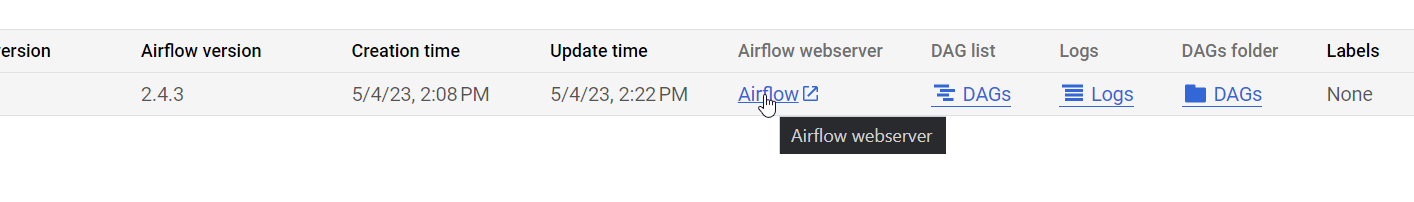

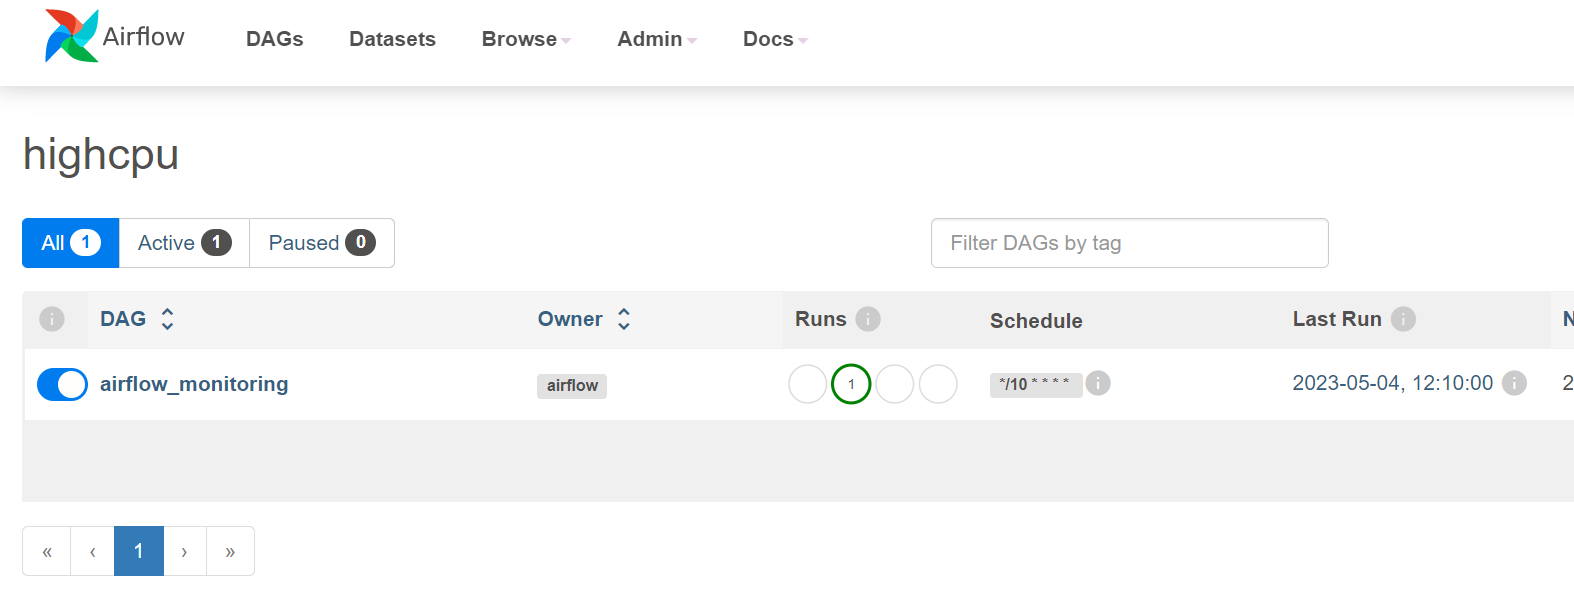

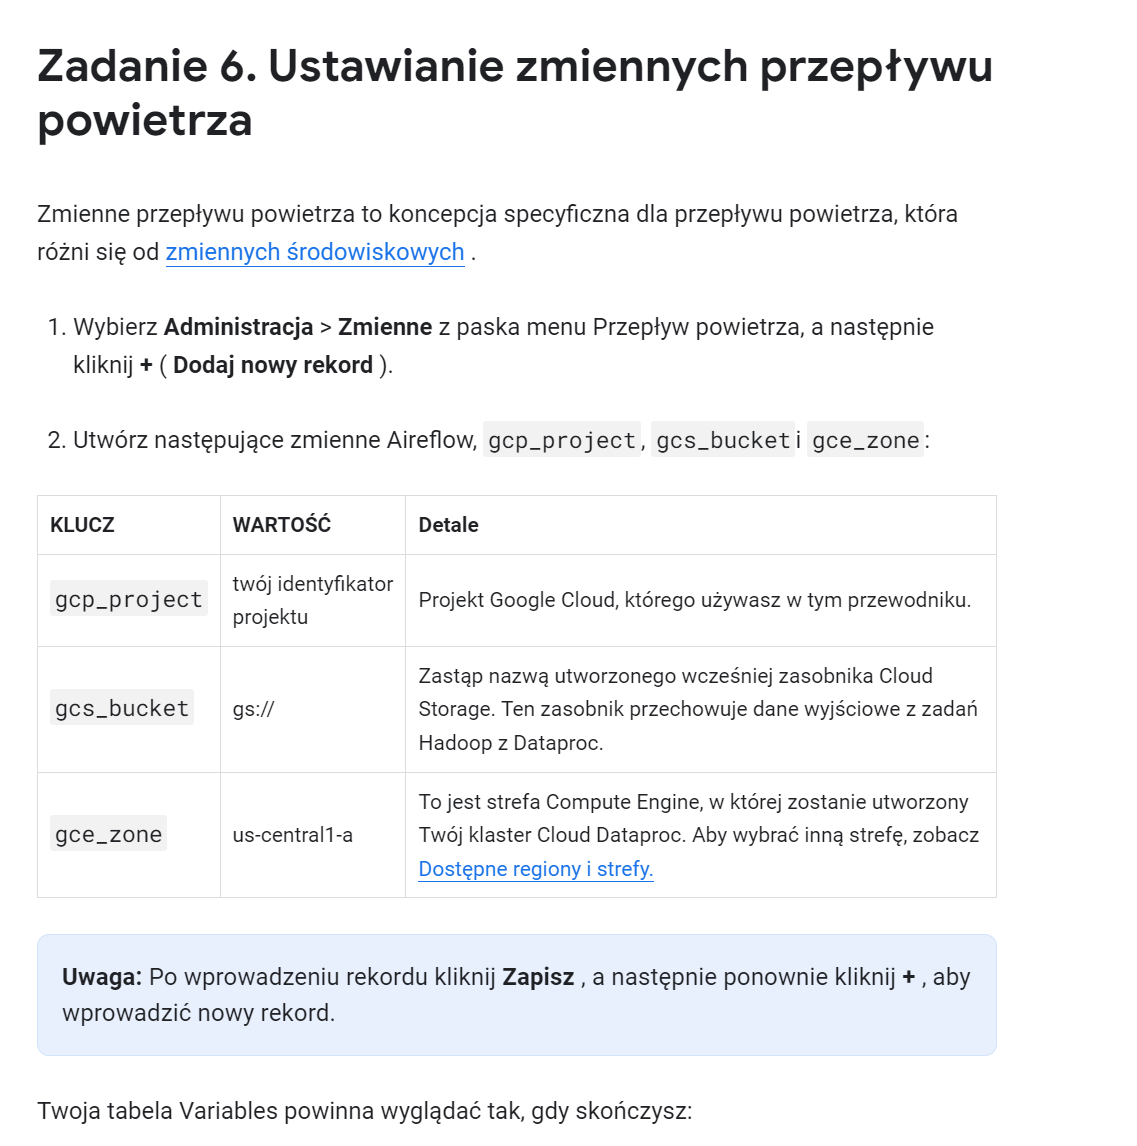

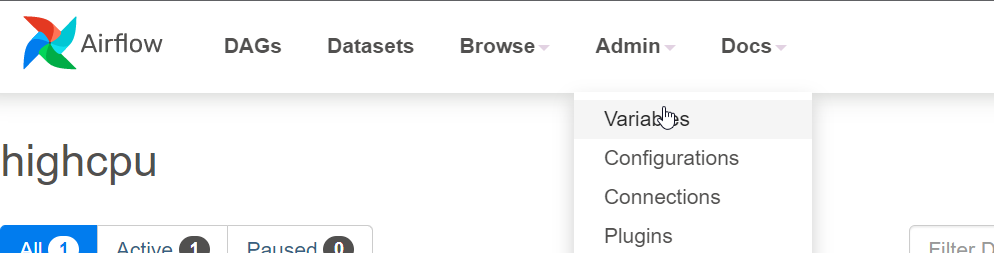

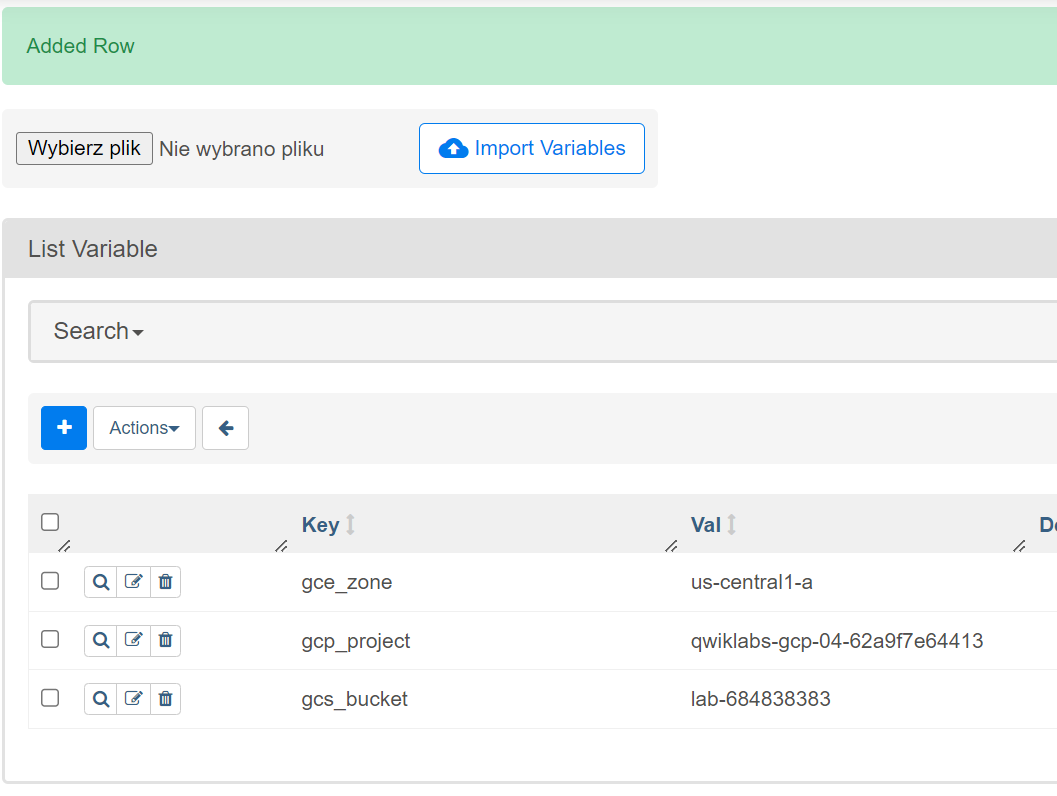

In [ ]:
# https://cloud.google.com/composer/docs/how-to/managing/environment-variables

In [ ]:
# qwiklabs-gcp-04-62a9f7e64413

# lab-684838383

# us-central1-a

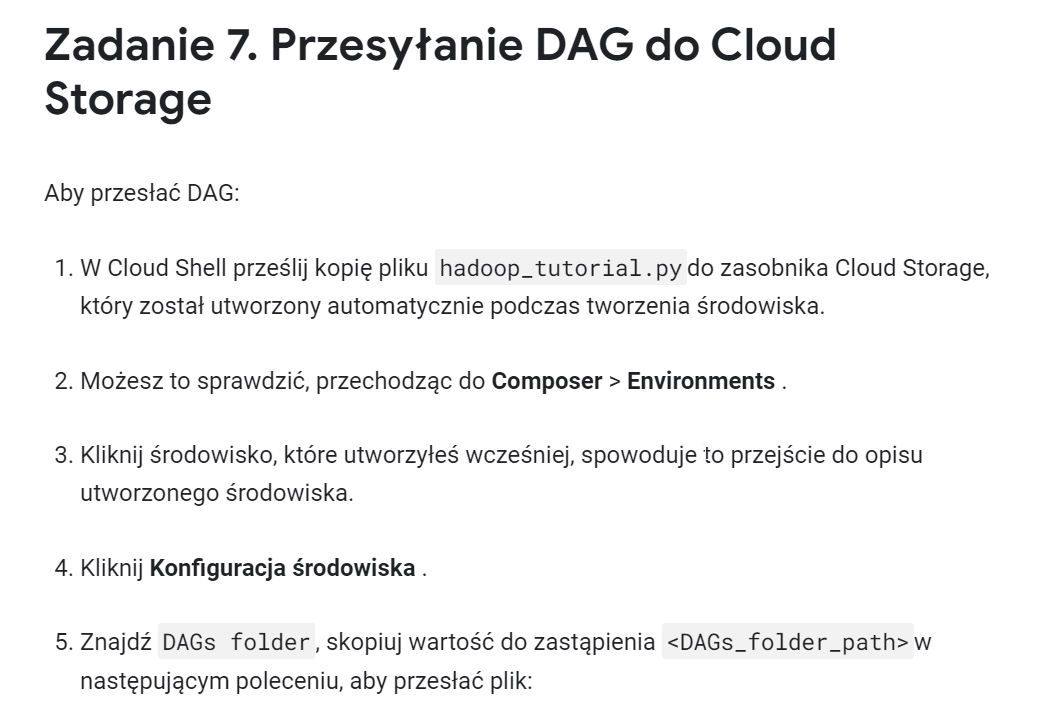

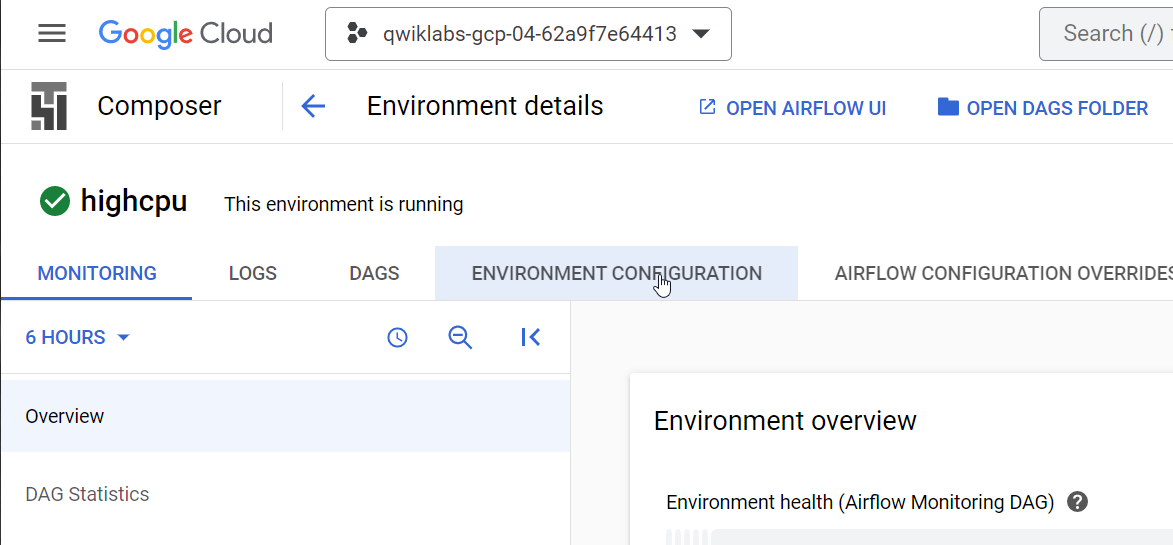

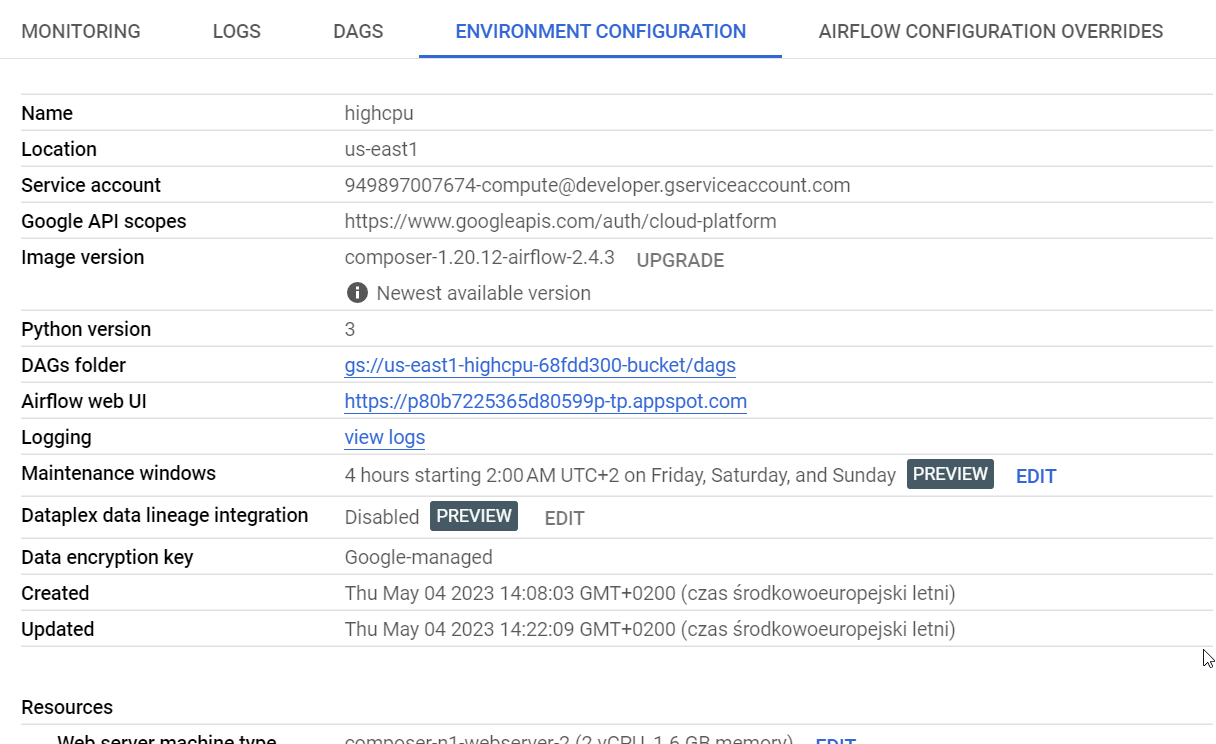

In [ ]:
gsutil cp gs://cloud-training/datawarehousing/lab_assets/hadoop_tutorial.py <DAGs_folder_path>

In [ ]:
gsutil cp gs://cloud-training/datawarehousing/lab_assets/hadoop_tutorial.py gs://us-east1-highcpu-68fdd300-bucket/dags

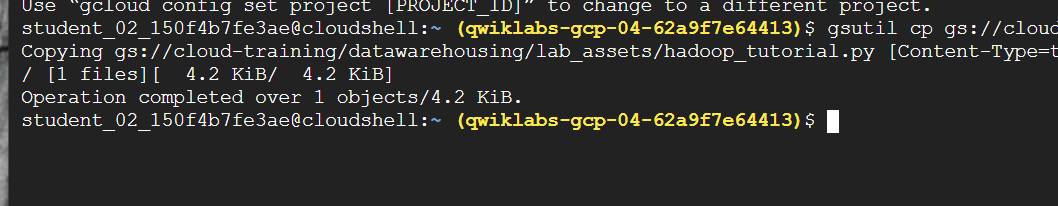

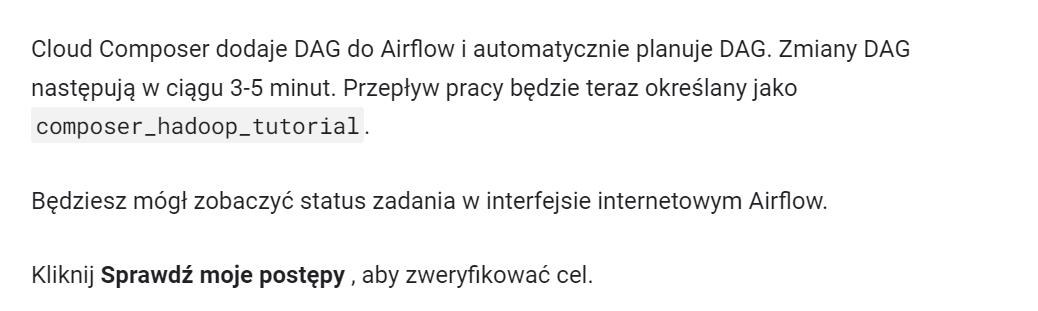

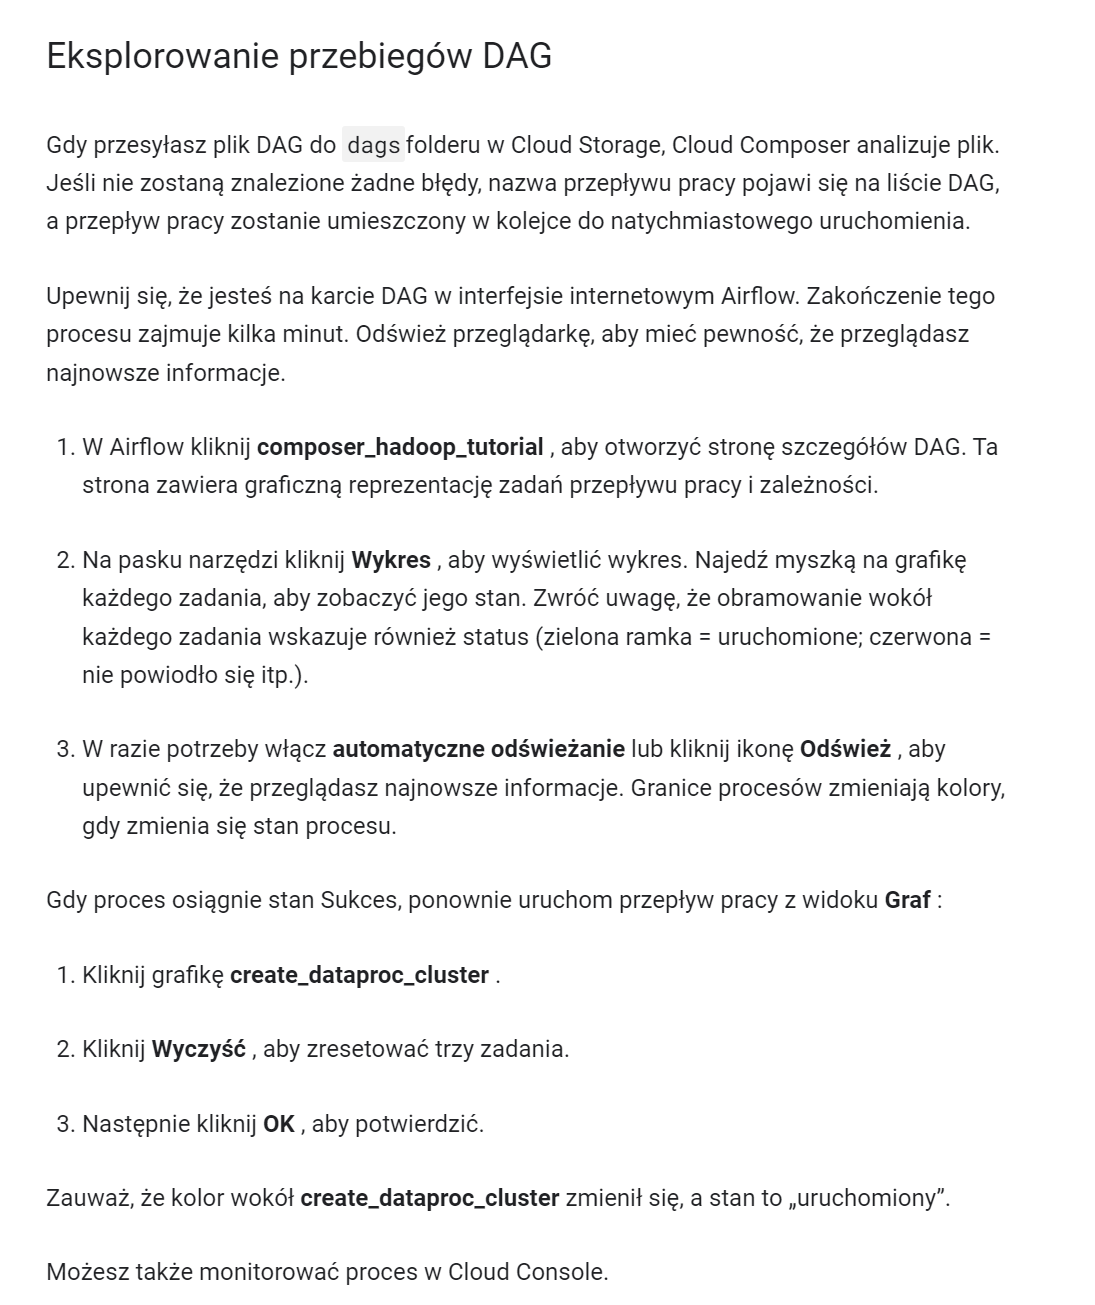

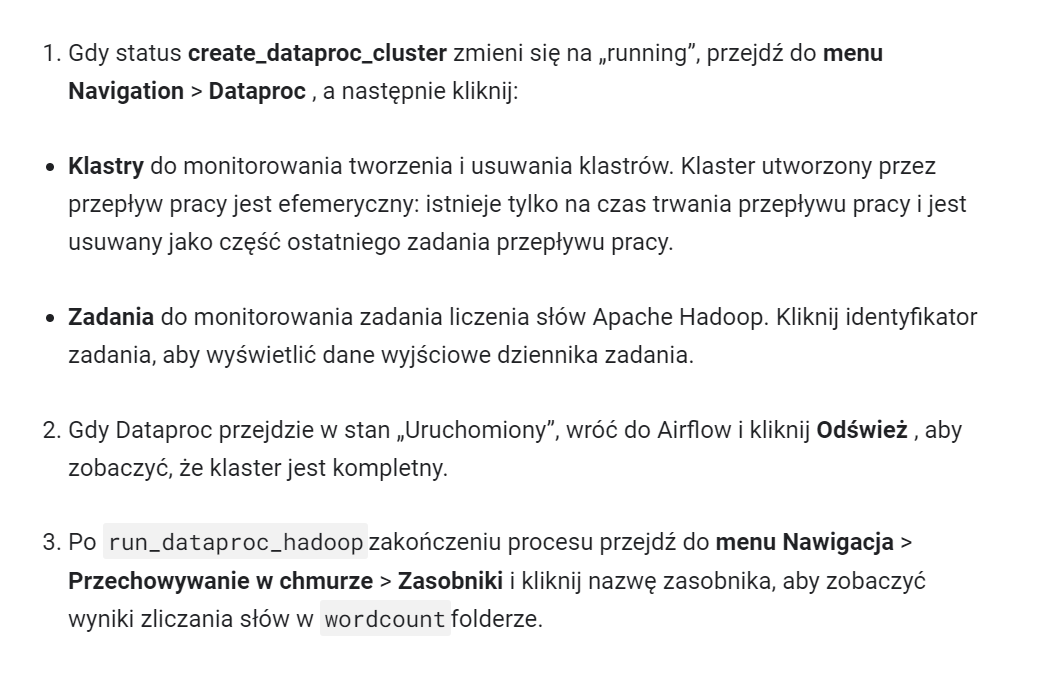

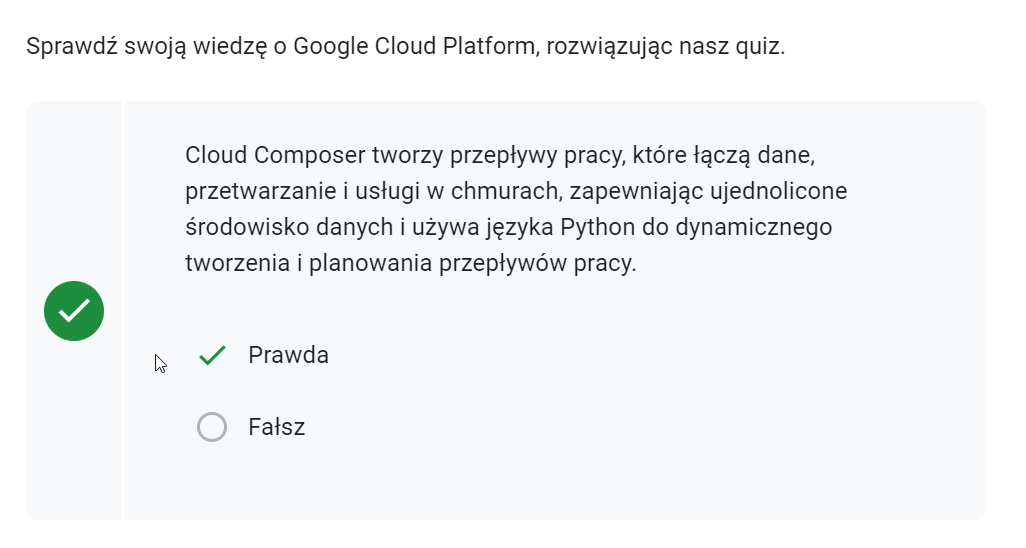

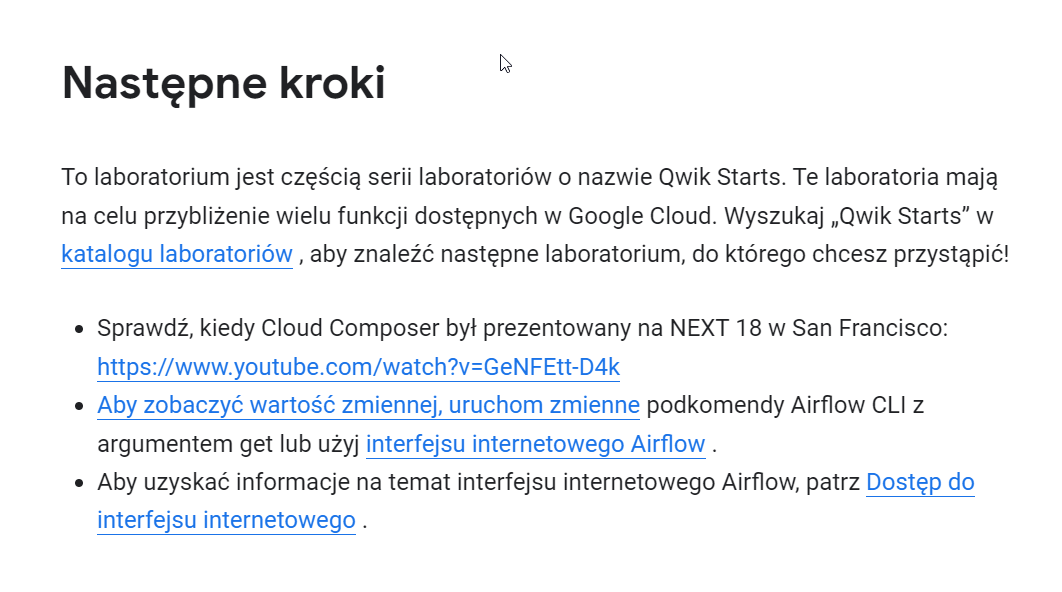

In [ ]:
# https://airflow.apache.org/docs/apache-airflow/stable/cli-and-env-variables-ref.html#variables

# https://cloud.google.com/composer/docs/run-apache-airflow-dag#variables-ui

# https://cloud.google.com/composer/docs/how-to/accessing/airflow-web-interface#accessing_the_web_interface

Lista DAG

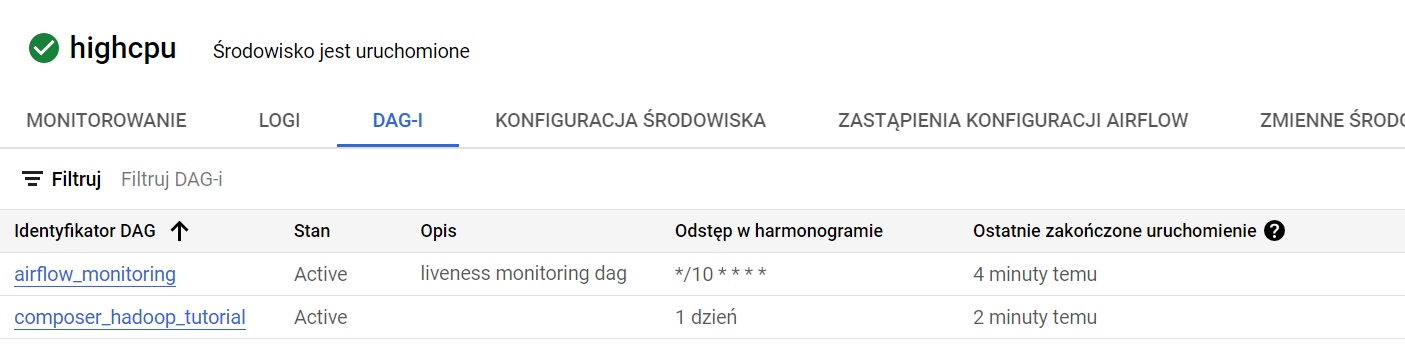

Folder z DAG

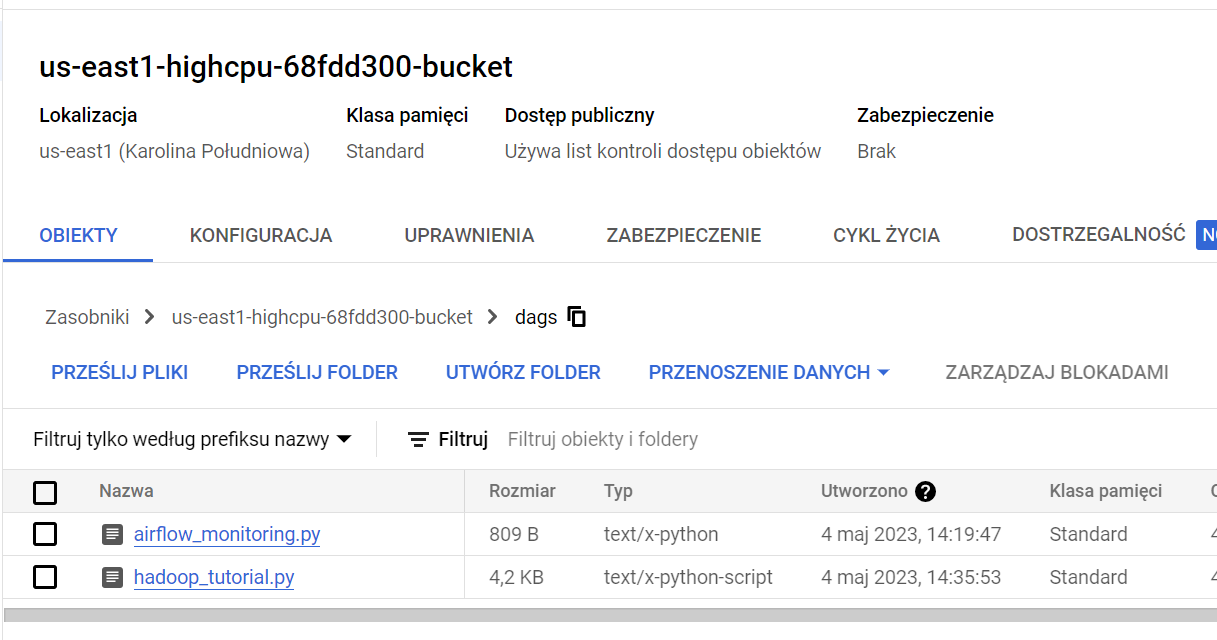

`airflow_monitoring.py`

In [ ]:
"""A liveness prober dag for monitoring composer.googleapis.com/environment/healthy."""
import airflow
from airflow import DAG
from airflow.operators.bash_operator import BashOperator
from datetime import timedelta

default_args = {
    'start_date': airflow.utils.dates.days_ago(0),
    'retries': 1,
    'retry_delay': timedelta(minutes=5)
}

dag = DAG(
    'airflow_monitoring',
    default_args=default_args,
    description='liveness monitoring dag',
    schedule_interval='*/10 * * * *',
    max_active_runs=2,
    catchup=False,
    dagrun_timeout=timedelta(minutes=10),
)

# priority_weight has type int in Airflow DB, uses the maximum.
t1 = BashOperator(
    task_id='echo',
    bash_command='echo test',
    dag=dag,
    depends_on_past=False,
    priority_weight=2**31 - 1,
    do_xcom_push=False)

`hadoop_tutorial.py`

In [ ]:
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# [START composer_hadoop_tutorial]
"""Example Airflow DAG that creates a Cloud Dataproc cluster, runs the Hadoop
wordcount example, and deletes the cluster.

This DAG relies on three Airflow variables
https://airflow.apache.org/concepts.html#variables
* gcp_project - Google Cloud Project to use for the Cloud Dataproc cluster.
* gce_zone - Google Compute Engine zone where Cloud Dataproc cluster should be
  created.
* gcs_bucket - Google Cloud Storage bucket to use for result of Hadoop job.
  See https://cloud.google.com/storage/docs/creating-buckets for creating a
  bucket.
"""

import datetime
import os

from airflow import models
from airflow.contrib.operators import dataproc_operator
from airflow.utils import trigger_rule

# Output file for Cloud Dataproc job.
output_file = os.path.join(
    models.Variable.get('gcs_bucket'), 'wordcount',
    datetime.datetime.now().strftime('%Y%m%d-%H%M%S')) + os.sep
# Path to Hadoop wordcount example available on every Dataproc cluster.
WORDCOUNT_JAR = (
    'file:///usr/lib/hadoop-mapreduce/hadoop-mapreduce-examples.jar'
)
# Arguments to pass to Cloud Dataproc job.
input_file = 'gs://pub/shakespeare/rose.txt'
wordcount_args = ['wordcount', input_file, output_file]

yesterday = datetime.datetime.combine(
    datetime.datetime.today() - datetime.timedelta(1),
    datetime.datetime.min.time())

default_dag_args = {
    # Setting start date as yesterday starts the DAG immediately when it is
    # detected in the Cloud Storage bucket.
    'start_date': yesterday,
    # To email on failure or retry set 'email' arg to your email and enable
    # emailing here.
    'email_on_failure': False,
    'email_on_retry': False,
    # If a task fails, retry it once after waiting at least 5 minutes
    'retries': 1,
    'retry_delay': datetime.timedelta(minutes=5),
    'project_id': models.Variable.get('gcp_project')
}

# [START composer_hadoop_schedule]
with models.DAG(
        'composer_hadoop_tutorial',
        # Continue to run DAG once per day
        schedule_interval=datetime.timedelta(days=1),
        default_args=default_dag_args) as dag:
    # [END composer_hadoop_schedule]

    # Create a Cloud Dataproc cluster.
    create_dataproc_cluster = dataproc_operator.DataprocClusterCreateOperator(
        task_id='create_dataproc_cluster',
        # Give the cluster a unique name by appending the date scheduled.
        # See https://airflow.apache.org/code.html#default-variables
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        num_workers=2,
        region='us-central1',
        zone=models.Variable.get('gce_zone'),
        image_version='2.0',
        master_machine_type='n1-standard-2',
        worker_machine_type='n1-standard-2')

    # Run the Hadoop wordcount example installed on the Cloud Dataproc cluster
    # master node.
    run_dataproc_hadoop = dataproc_operator.DataProcHadoopOperator(
        task_id='run_dataproc_hadoop',
        region='us-central1',
        main_jar=WORDCOUNT_JAR,
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        arguments=wordcount_args)

    # Delete Cloud Dataproc cluster.
    delete_dataproc_cluster = dataproc_operator.DataprocClusterDeleteOperator(
        task_id='delete_dataproc_cluster',
        region='us-central1',
        cluster_name='composer-hadoop-tutorial-cluster-{{ ds_nodash }}',
        # Setting trigger_rule to ALL_DONE causes the cluster to be deleted
        # even if the Dataproc job fails.
        trigger_rule=trigger_rule.TriggerRule.ALL_DONE)

    # [START composer_hadoop_steps]
    # Define DAG dependencies.
    create_dataproc_cluster >> run_dataproc_hadoop >> delete_dataproc_cluster
    # [END composer_hadoop_steps]

# [END composer_hadoop_tutorial]

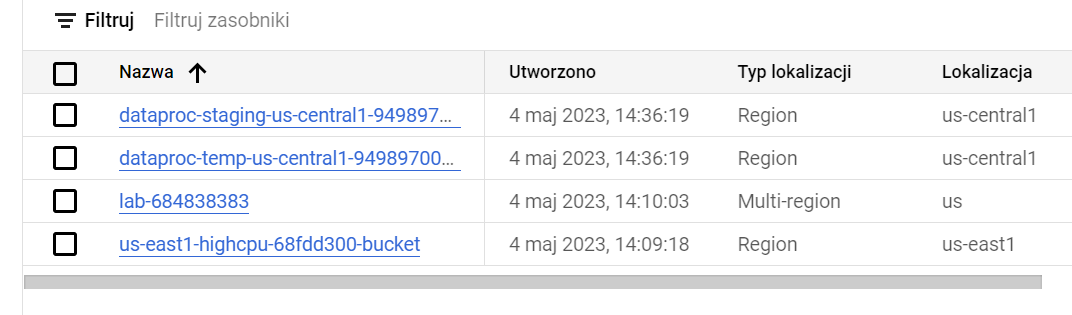

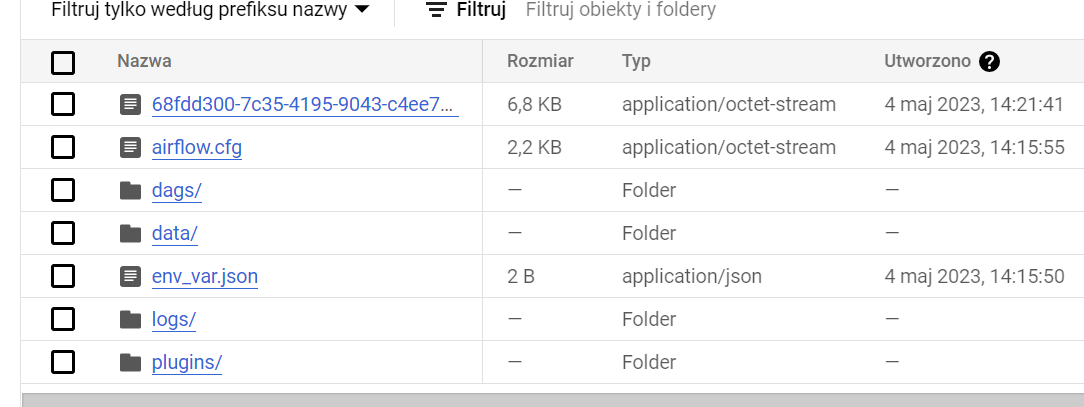

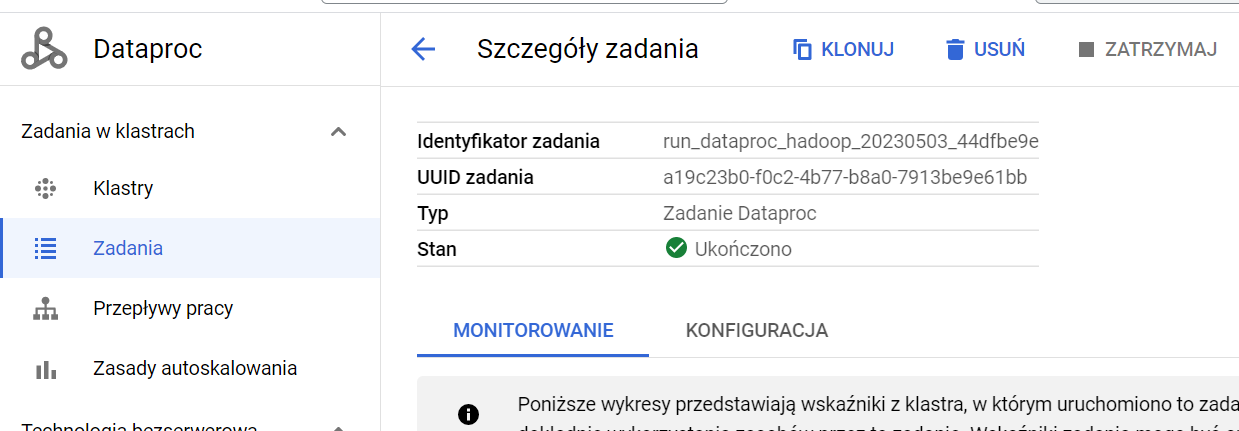

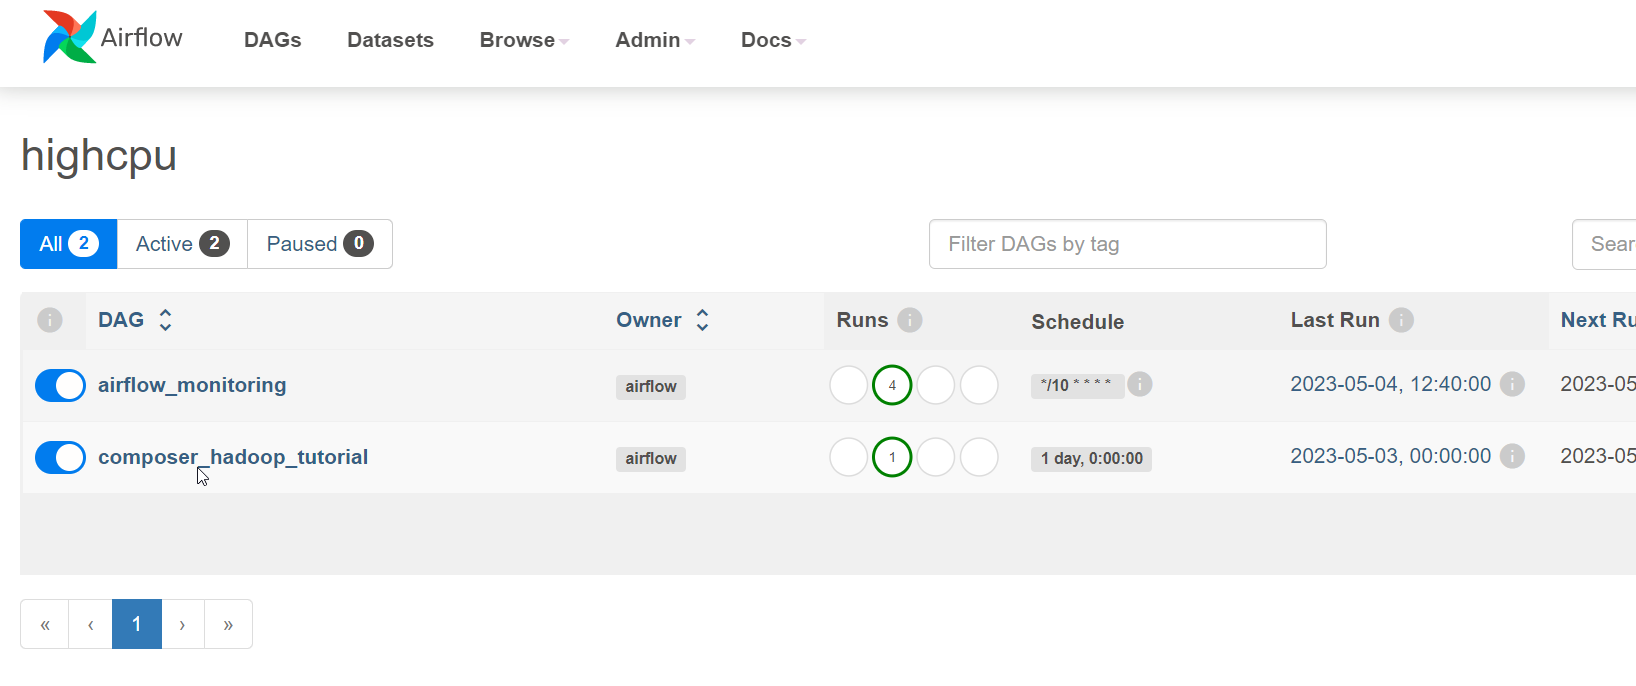